In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px

In [55]:
DATA_DIR = "../data"
DATA_PROCESSED =  DATA_DIR + "/processed"
PROCESSED_CONT_PATH = f"{DATA_PROCESSED}/contaminantes.csv"
PROCESSED_PIV_MET_PATH = f"{DATA_PROCESSED}/piv_meteo.csv"

# Contaminantes

In [3]:
cont = pd.read_csv(PROCESSED_CONT_PATH)
cont.head()

,date,CO,NO2,O3,PM10,PM2.5,SO2
0,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-01 01:00:00,0.49,3.9,22.0,21.0,NaN,2.8
2,2021-07-01 02:00:00,0.51,8.4,17.0,24.0,3.0,3.1
3,2021-07-01 03:00:00,0.50,6.4,19.0,22.0,5.0,3.0
4,2021-07-01 04:00:00,0.51,10.0,14.0,35.0,15.0,3.2


In [5]:
print(cont.isna().sum())
print(f"Total faltantes: {cont.isna().sum().sum()}")

date       0
CO       209
NO2      273
O3       278
PM10     415
PM2.5    463
SO2      469
dtype: int64
Total faltantes: 2107


In [6]:
# N. filas con valores faltantes
tmp = cont.isna().sum(axis=1).astype('bool').sum() 
print(f"Filas con valores faltantes: {tmp}")
# Proporción de filas con valores faltantes
tmp / len(cont)

Filas con valores faltantes: 1013


0.09243544118988958

In [7]:
cont.describe()

,CO,NO2,O3,PM10,PM2.5,SO2
count,10750.000000,10686.000000,10681.000000,10544.000000,10496.000000,10490.000000
mean,1.400898,15.805091,27.417751,63.848634,17.572790,5.125558
std,0.588803,9.997033,19.916356,39.707023,10.036885,2.776635
min,0.240000,0.300000,1.000000,5.000000,2.000000,1.500000
25%,0.880000,8.400000,12.000000,40.000000,10.000000,3.800000
50%,1.260000,14.100000,23.000000,56.000000,16.000000,4.400000
75%,1.910000,20.600000,38.000000,78.000000,23.000000,5.600000
max,4.740000,75.900002,136.000000,746.000000,105.000000,83.800003


In [9]:
cont = cont.dropna()

Text(0.5, 0.98, 'Contaminantes')

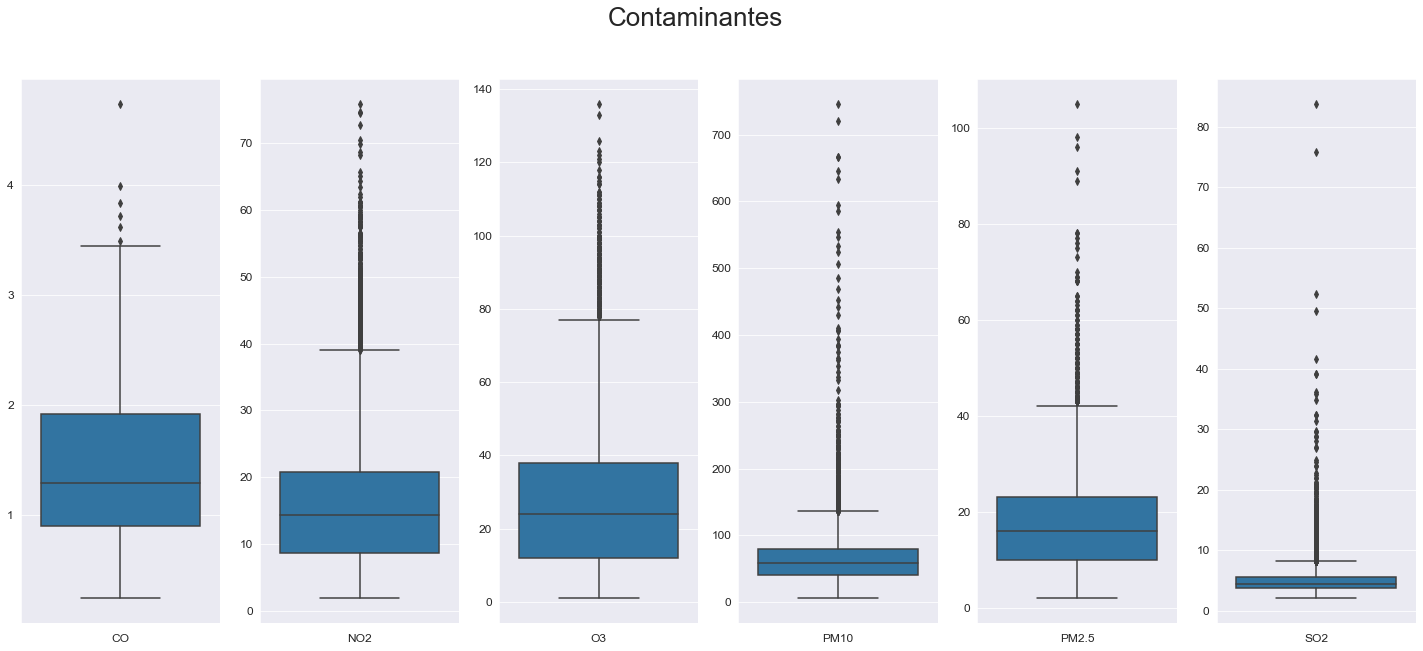

In [35]:
fig, axs = plt.subplots(1, 6, figsize=(25,10))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = cont.select_dtypes(include=numerics).columns

for i, col in enumerate(cols):
    
    sns.boxplot(data=cont, y=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("")

fig.suptitle('Contaminantes', fontsize=26)

In [47]:
fig = px.imshow(cont.corr(), color_continuous_scale='ice', title='Mapa Correlación')

fig.layout.height = 500
fig.layout.width = 500

fig.show()

# Meteorologica

In [56]:
met = pd.read_csv(PROCESSED_PIV_MET_PATH)
met.head()

,date,PRS,RAINF,RH,SR,TOUT,WDR,WSR
0,2021-07-01 00:00:00,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2021-07-01 01:00:00,714.50000,0.0,77.0,0.0,22.32,79.0,109.7
2,2021-07-01 02:00:00,714.20001,0.0,77.0,0.0,22.50,74.0,109.7
3,2021-07-01 03:00:00,714.20001,0.0,76.0,0.0,22.58,69.0,106.9
4,2021-07-01 04:00:00,714.20001,0.0,79.0,0.0,22.24,81.0,118.4


### Faltantes

In [58]:
print(met.isna().sum())
print(f"Total faltantes: {met.isna().sum().sum()}")

date       0
PRS      214
RAINF    211
RH       233
SR        16
TOUT     214
WDR      704
WSR      268
dtype: int64
Total faltantes: 1860


In [61]:
# N. filas con valores faltantes
tmp = met.isna().sum(axis=1).astype('bool').sum() 
print(f"Filas con valores faltantes: {tmp}")
# Proporción de filas con valores faltantes
tmp / len(met)

Filas con valores faltantes: 789


0.07199562003832466

Text(0.5, 0.98, 'Meteorológicas')

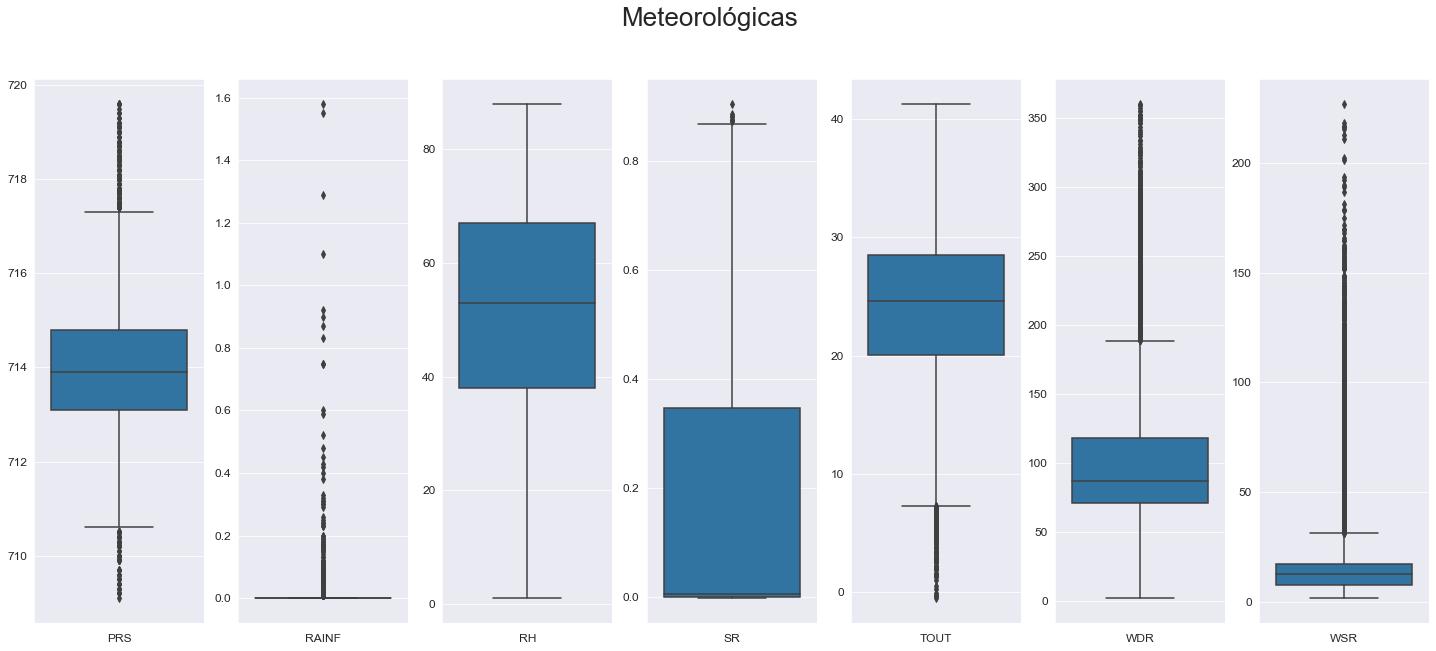

In [64]:
fig, axs = plt.subplots(1, 7, figsize=(25,10))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = met.select_dtypes(include=numerics).columns

for i, col in enumerate(cols):
    
    sns.boxplot(data=met, y=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("")

fig.suptitle('Meteorológicas', fontsize=26)

In [60]:
fig = px.imshow(met.corr(), color_continuous_scale='ice', title='Mapa Correlación')

fig.layout.height = 500
fig.layout.width = 500

fig.show()